In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %run Linear_Regression.ipynb

%matplotlib inline

In [2]:
def split_data(df, seed_num=2):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    # Create array of all the index
    idx = np.arange(n)

    # Create a random index
    np.random.seed(seed_num)            #Every shuffle remain the same
    
    np.random.shuffle(idx)
    
    #Re distribute all the data
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    return df_train, df_val, df_test

In [3]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [4]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [5]:
# def rmse(y, y_pred):
#     result = np.empty_like(y)
#     chunk_size = len(y_pred)
#     for i in range(0, len(y), chunk_size):
#         chunk = y[i:i+chunk_size]
#         result[i:i+chunk_size] = chunk - y_pred
#     mse = (result ** 2).mean()
#     return np.sqrt(mse)

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [6]:
def prepare_X(df, fillna=0):
    df = df.copy()
    df_num = df.fillna(fillna)
    X = df_num.values
    return X

In [7]:
df = pd.read_csv('../module1/raw_housing_data.csv')

In [8]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
col_needed = [
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]
df = df[df["ocean_proximity"] == "NEAR BAY"]
df = df[col_needed]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
19067,38.28,-122.45,20.0,3306.0,503.0,1374.0,460.0,5.7984,297600.0
19068,38.29,-122.47,14.0,3732.0,846.0,1277.0,775.0,2.5658,208000.0
19069,38.27,-122.45,25.0,5024.0,881.0,1994.0,838.0,4.2237,262300.0
19077,38.27,-122.49,8.0,5092.0,988.0,1657.0,936.0,3.5625,213200.0


In [10]:
#Check missin value
df.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        20
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

In [11]:
#get the median for population
np.median(df["population"])

1033.5

In [12]:
df_train, df_val, df_test = split_data(df, 42)

len(df_train), len(df_val), len(df_test)

(1374, 458, 458)

In [13]:
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.75,-122.14,33.0,1334.0,200.0,579.0,202.0,6.8323,255900.0
1,37.92,-122.36,52.0,215.0,41.0,126.0,43.0,1.3929,104200.0
2,37.81,-122.28,19.0,1207.0,243.0,721.0,207.0,1.1111,108300.0
3,37.85,-122.28,52.0,1898.0,421.0,1102.0,397.0,1.8080,105500.0
4,37.76,-122.45,31.0,5283.0,1330.0,2659.0,1269.0,3.5744,500000.0
...,...,...,...,...,...,...,...,...,...
453,37.87,-122.30,52.0,3123.0,749.0,1695.0,684.0,2.2208,144800.0
454,37.76,-122.49,52.0,2564.0,502.0,1092.0,459.0,3.5302,329600.0
455,37.65,-122.08,35.0,1813.0,393.0,1093.0,374.0,3.6818,165400.0
456,37.92,-122.32,29.0,2304.0,399.0,1377.0,454.0,5.0187,140600.0


In [14]:
y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [15]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.44,-122.14,52.0,3117.0,468.0,1114.0,421.0,6.6756
1,37.91,-122.30,40.0,2866.0,617.0,1305.0,589.0,3.6321
2,37.92,-122.30,33.0,1615.0,271.0,710.0,285.0,4.0804
3,37.83,-122.26,52.0,1443.0,311.0,660.0,292.0,3.0125
4,37.47,-122.20,40.0,2959.0,389.0,985.0,365.0,9.9025
...,...,...,...,...,...,...,...,...
1369,37.76,-122.45,52.0,1457.0,292.0,621.0,315.0,4.6477
1370,37.96,-122.51,39.0,3302.0,684.0,1574.0,653.0,3.6863
1371,37.38,-122.08,36.0,1199.0,198.0,485.0,199.0,5.0796
1372,37.93,-122.48,16.0,2947.0,802.0,1385.0,743.0,3.6731


### Train without Regularization

In [16]:
#Calculate the mean of the missing value
total_bed_mean = np.mean(df_train["total_bedrooms"])

In [17]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)


In [18]:
round(rmse(y_val, y_pred), 2)

0.34

In [19]:
# RMSE With the mean
X_train = prepare_X(df_train, total_bed_mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

0.33

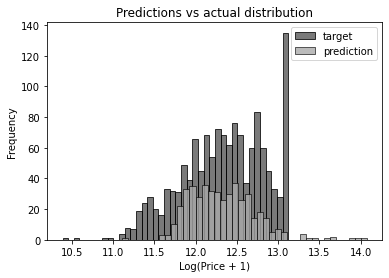

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [21]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for v in r:
    X_train = prepare_X(df_train, total_bed_mean)
    w_0, w = train_linear_regression_reg(X_train, y_train, v)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 5)
    print(v, score)

0 0.33482
1e-06 0.33483
0.0001 0.33517
0.001 0.33887
0.01 0.34975
0.1 0.35356
1 0.35413
5 0.35484
10 0.35586


### Split the data based on different seed

In [22]:
def score_at_difseed(se):
    df_train, df_val, df_test = split_data(df, se)
    y_train_orig = df_train['median_house_value'].values
    y_val_orig = df_val['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values
    
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    
    return rmse(y_val, y_pred)

In [23]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sd = []
for s in seeds:
    sd.append(score_at_difseed(s))
    
sd = np.array(sd)
round(np.std(sd), 5)

0.00567

### Resplit the dataset using seed 9

In [24]:
df_train, df_val, df_test = split_data(df, 9)

In [25]:
y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values
print(y_test_orig[20])
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

92500.0


In [26]:
#Combining the models
df_full = pd.concat([df_train, df_val])
df_full = df_full.reset_index(drop=True)
X_full_train = prepare_X(df_full, 0)
X_full_train.shape

(1832, 8)

In [27]:
y_full = np.concatenate([y_train, y_val])
y_full

array([11.32781201, 11.82188701, 12.82099068, ..., 11.85225789,
       12.4292202 , 12.59269806])

In [28]:
w0, w = train_linear_regression_reg(X_full_train, y_full, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.31691537181340895

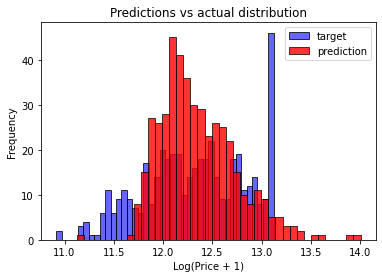

In [29]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [30]:
i = 30
ad = df_test.iloc[i].to_dict()
ad

{'latitude': 37.97,
 'longitude': -122.3,
 'housing_median_age': 30.0,
 'total_rooms': 4030.0,
 'total_bedrooms': 772.0,
 'population': 1777.0,
 'households': 718.0,
 'median_income': 3.6393}

In [31]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion


203695.61063117304

In [32]:
np.expm1(y_test[30])

184000.00000000015